# Soft Computing - rač. vežba 1

##Anaconda, IPython, NumPy, OpenCV, osnove obrade digitalne slike

Cilj ovih vežbi je upoznavanje za Anaconda platformom, IPython-om, NumPy biblitekom i osnovnim funkcionalnostima OpenCV frameworka za obradu digitalne slike.
* Anaconda - platforma bazirana na Python programskom jeziku, koja sadrži veliki broj biblioteka (preko 300) za analizu podataka, mašinsko učenje, numeričke metode, vizualizaciju podataka itd. (https://www.continuum.io/why-anaconda)
* IPython - Interactive Python - omogućava interaktivno računarstvo, pokretanje samo određenih delova koda, kao i alatke za paralelizaciju izvršavanja koda
* NumPy - moćna biblioteka za računarstvo u nauci, sadrži bogat skup funkcija nad nizovima, matricama, kao i linearnu algebru. Po korišćenju veoma slična MATLAB-u.
* OpenCV - framework namenjen oblasti računarske vizije (eng. computer vision) (https://opencv-python-tutroals.readthedocs.org/en/latest/py_tutorials/py_tutorials.html)

In [93]:
# omogucava iscrtavanje slika unutar samog browsera
%matplotlib inline

In [120]:
import cv2 # OpenCV biblioteka
import numpy as np # NumPy biblioteka, "np" je sinonim koji se koristi dalje u kodu kada se koriste funkcije ove biblioteke
import matplotlib.pyplot as plt # biblioteka za plotovanje, tj. crtanje grafika, slika... "plt" je sinonim

#import matplotlib.pylab as pylab
#pylab.rcParams['figure.figsize'] = 16, 12 # za prikaz većih slika

### Učitavanje slike
OpenCV ima metodu za učitavanje slike sa diska - **imread(path_to_image)**, koja kao parametar prima putanju do slike na disku. Učitana slika *image* je zapravo NumPy matrica, čije dimenzije zavise od same prirode slike. Ako je slika u boji, onda je *image* trodimenzionalna matrica, čije su prve dve dimenzije visina i širina slike, treća dimenzija je veličine 3, jer ona predstavlja boju (RGB, po jedan element za svaku osnovnu boju).

(438L, 780L, 3L)


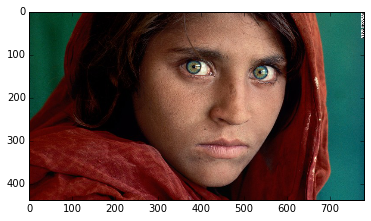

In [95]:
image = cv2.imread('images/girl.jpg') # ucitavanje slike sa diska
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # konvertovanje iz BGR u RGB model boja (jer OpenCV ucita sliku kao BGR)
print image.shape # ispis velicine slike
plt.imshow(image) # prikazivanje slike

### Konvertovanje slike u nijanse sive (grayscale)
Konvertovanje slike u boji u sliku sa nijansama sive (grayscale) se vrši na sledeći način (pseudo-kod):
```code
slika_grayscale = istih dimenzija kao slika_rgb (ali bez trece dimenzije)
za svaki piksel na slika_rgb:
    odgovarajuci piksel na slika_grayscale = 0.2989*R + 0.587*G + 0.114*B
```

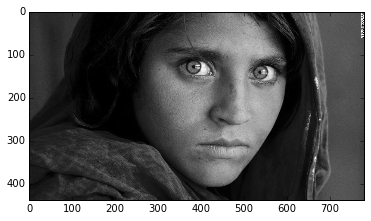

In [96]:
height, width = image.shape[0:2]
# ndarray je n-dimensional array, odnosno n-dimenzionalna matrica. Grayscale slika nema RGB, 
# vec samo intenzitet piksela (0 je crno, 255 je belo, sve ostalo izmedju je nijansa sive).
# Sa dtype=np.uint8 se naglasava da je u pitanju 8-bitni tip podatka za elemente matrice, tj. piksele
image_gray = np.ndarray((height, width), dtype=np.uint8)

# za svaki piksel na slici u boji
for i in range(0, height):
     for j in range(0, width):
        pixel = image[i, j] # preuzimanje piksela
        r,g,b = pixel[0], pixel[1], pixel[2] # preuzimanje RGB komponenti piksela
        gray = float(r) * .2989 + float(g) * .587 + float(b) * .114 # racunanje grayscale intenziteta
        image_gray[i, j] = gray # postavljanje piksela na rezultujucoj slici
        
plt.imshow(image_gray, 'gray')

### Histogram
Histogram je tip grafika koji prikazuje koliko su pikseli određenog intenziteta zastupljeni na slici.

**TODO:** Implementirati histogram za sliku *image_gray*, pseudo-kod:
```code
za svaki piksel na slici:
    preuzeti intenzitet piksela
    uvecati za 1 broj piksela tog intenziteta
```

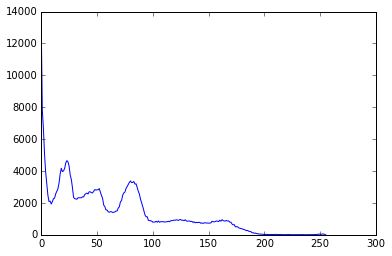

In [97]:
histogram = np.zeros(256)

# TODO
for i in range(0, height):
     for j in range(0, width):
            histogram[image_gray[i,j]] += 1

plt.plot(range(0,256), histogram, 'b')
plt.show()

### Binarizacija slike (threshold) - verzija 1
Binarizacija slike (eng. threshold) je uobičajen postupak izdvajanja sadržaja (eng. foreground) od pozadine (eng. background). Prilikom binarizacije se odabere prag, i zatim svi pikseli koji imaju intenzitet manji od tog praga dobijaju vrednost 0 (postaju crni), a svi pikseli koji imaju intenzitet veći od zadatog praga dobijaju vrednost 255 (postaju beli).

**TODO:** Implenetirati binarizaciju slike (threshold) za prag 127.

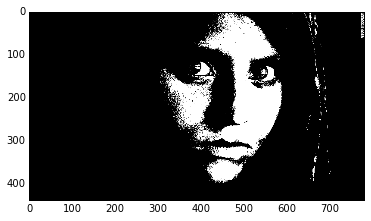

In [98]:
image_bin1 = np.ndarray((height, width), dtype=np.uint8)

for i in range(0, image.shape[0]):
     for j in range(0, image.shape[1]):
        image_bin1[i, j] = 255 if image_gray[i, j] > 127 else 0
        
plt.imshow(image_bin1, 'gray')

### Binarizovanje slike (threshold) - verzija 2

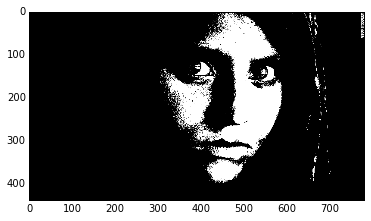

In [99]:
image_bin2 = (image_gray > 127) * 255
plt.imshow(image_bin2, 'gray')

### Primer IPython widgeta

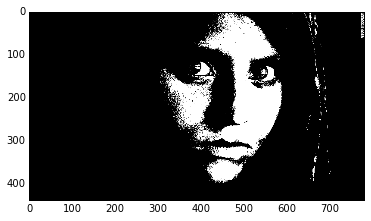

In [100]:
from IPython.html import widgets
from IPython.html.widgets import interactive
from IPython.display import display

def threshold(threshold): # metoda se zove threshold, i prima parametar threshold
    image_bin2 = (image_gray > threshold) * 255
    plt.imshow(image_bin2, 'gray')
    

a_slider = widgets.IntSlider(min=0, max=255, step=1, value=127)
w = widgets.interactive(threshold, threshold=a_slider)
display(w)

### Grayscale i threshold - OpenCV
Od sad i do kraja ovog kursa će se koristiti OpenCV za sve operacije nad digitalnim slikama.

OpenCV ima metodu **cvtColor(image, cv2.COLOR_RGB2GRAY)**, gde drugi parametar **cv2.COLOR_RGB2GRAY** kaže da se slika konvertuje iz RGB modela boja u grayscale.

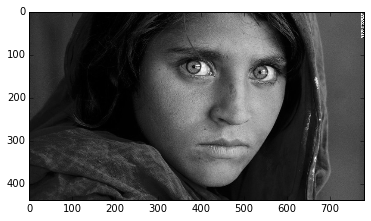

In [101]:
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image_gray, 'gray')

OpenCV takođe ima metodu **threshold**, koja kao prvi parametar prima sliku koja se binarizuje, kao drugi parametar prima prag binarizacije, treći parametar je vrednost rezultujućeg piksela ako je veći od praga (255 = belo), poslednji parametar je tip thresholda (u ovom slučaju je binarizacija).

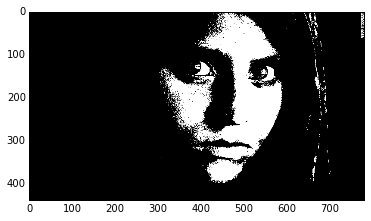

In [102]:
ret, image_bin = cv2.threshold(image_gray, 125, 255, cv2.THRESH_BINARY) # ret je vrednost praga, image_bin je binarna slika
plt.imshow(image_bin, 'gray')

### Otsu threshold
Otsu metoda se koristi za automatsko pronalaženje praga za threshold na slici. (https://en.wikipedia.org/wiki/Otsu's_method)

Otsu's threshold: 70.0


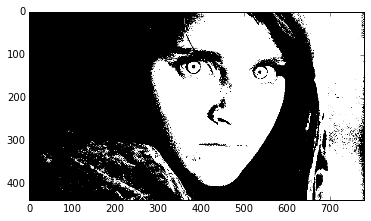

In [103]:
ret, image_bin = cv2.threshold(image_gray,0, 255, cv2.THRESH_OTSU) # ret je izracunata vrednost praga, image_bin je binarna slika
print 'Otsu\'s threshold: ' + str(ret)
plt.imshow(image_bin, 'gray')

### Adaptivni threshold
U nekim slučajevima primena globalnog praga za threshold ne daje dobre rezultate. Dobar primer su slike na kojima se menja osvetljenje, gde globalni threshold praktično uništi deo slike koji je previše osvetljen ili zatamnjen.

Adaptivni threshold je drugačiji pristup, gde se za svaki piksel na slici izračunava zaseban prag, na osnovu njemu okolnih piksela. (http://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html#gsc.tab=0)

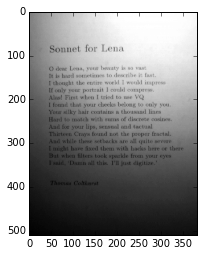

In [104]:
image_ada = cv2.imread('images/sonnet.png')
image_ada = cv2.cvtColor(image_ada, cv2.COLOR_BGR2GRAY)
plt.imshow(image_ada, 'gray')

Primer loših rezultata sa globalnim thresholdom. Probajte da podesite prag tako da slova budu jasno čitljiva u odnosu na pozadinu.

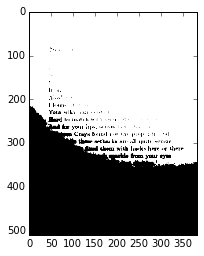

In [105]:
ret, image_ada_bin = cv2.threshold(image_ada, 100, 255, cv2.THRESH_BINARY)
plt.imshow(image_ada_bin, 'gray')

Primer poboljšanja rezultata korišćenja adaptivnog thresholda. Pretposlednji parametar metode **adaptiveThreshold** je ključan, jer predstavlja veličinu bloka susednih piksela (npr. 15x15) na osnovu kojih se računa lokalni prag. Probajte da menjate poslednji parametar i zaključite šta on znači. 

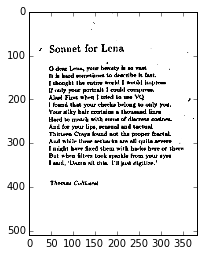

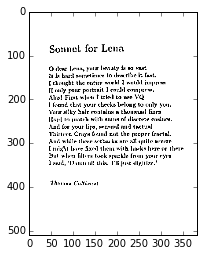

In [106]:
# adaptivni threshold gde se prag racuna = srednja vrednost okolnih piksela
image_ada_bin = cv2.adaptiveThreshold(image_ada, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 5)
plt.figure() # plt.figure() ako je potrebno da se prikaze vise slika u jednoj celiji
plt.imshow(image_ada_bin, 'gray')

# adaptivni threshold gde se prag racuna = tezinska suma okolnih piksela, gde su tezine iz gausove raspodele
image_ada_bin = cv2.adaptiveThreshold(image_ada, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 5)
plt.figure() # plt.figure() ako je potrebno da se prikaze vise slika u jednoj celiji
plt.imshow(image_ada_bin, 'gray')

### Morfološke operacije - dilatacija, erozija, otvaranje, zatvaranje
Morfološke operacije nad digitalnom slikom se koriste za uklanjanje raznih šumova i smetnji koji su posledica same obrade slike - konvertovanja, binarizacije, itd. Morfološke operacije se vrše nad binarnom slikom.

Morfološke operacije menjaju sliku korišćenjem tzv. strukturnog elemeta, odnosno kernela. Strukturni element se postavlja "preko" svakog piksela na slici i poredi se sa susednim pikselima koje zahvata. Tipičan strukturni element je 3x3 matrica.

#### Dilatacija
![Dilation](https://www.cs.auckland.ac.nz/courses/compsci773s1c/lectures/ImageProcessing-html/mor-pri-dilation.gif)

#### Erozija
![Erosion](https://www.cs.auckland.ac.nz/courses/compsci773s1c/lectures/ImageProcessing-html/mor-pri-erosion.gif)

#### Otvaranje
Kombinacija: prvo erozija pa dilatacija

#### Zatvaranje
Kombinacija: prvo dilatacija pa erozija

### OpenCV - morfološke operacije
OpenCV dilatacija - metoda **dilate**, erozija - metoda **erode**. Neophodno je proslediti i strukturni element, odnosno kernel.

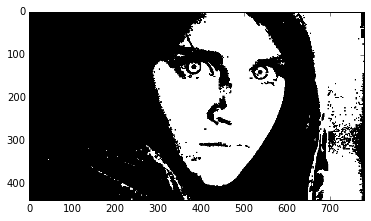

In [110]:
kernel = np.ones((3,3)) # strukturni element 3x3 blok
#kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
plt.imshow(cv2.erode(image_bin, kernel, iterations=1), 'gray')

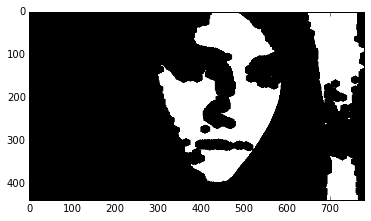

In [114]:
# drugaciji strukturni element
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5)) # MORPH_ELLIPSE, MORPH_STAR, MORPH_RECT
plt.imshow(cv2.erode(image_bin, kernel, iterations=5), 'gray')

### Pronalaženje kontura/regiona - Barcode

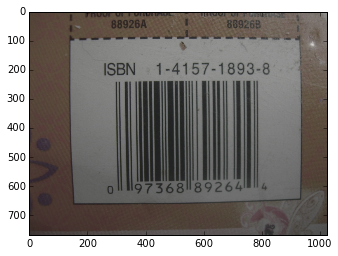

In [116]:
# ucitavanje slike i konvert u RGB
image_barcode = cv2.cvtColor(cv2.imread('images/barcode.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(image_barcode)

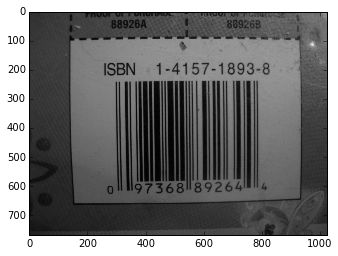

In [117]:
image_barcode_gs = cv2.cvtColor(image_barcode, cv2.COLOR_RGB2GRAY) # konvert u grayscale
plt.imshow(image_barcode_gs, 'gray')

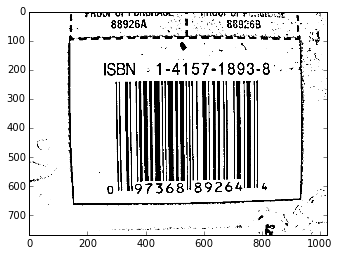

In [118]:
#ret, image_barcode_bin = cv2.threshold(image_barcode_gs, 80, 255, cv2.THRESH_BINARY)
image_barcode_bin = cv2.adaptiveThreshold(image_barcode_gs, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 35, 10)
plt.imshow(image_barcode_bin, 'gray')

#### Pronaleženje kontura/regiona
Konture, odnosno regioni na slici su grubo rečeno grupe crnih piksela. OpenCV metoda **findContours** pronalazi sve ove grupe crnih piksela, tj. regione. Druga povratna vrednost metode, odnosno *contours* je lista svih pronađenih kontura na slici.

Ove konture je zatim moguće iscrtati metodom **drawContours**, gde je prvi parametar slika na kojoj se iscrtavaju pronađene konture, drugi parametar je lista kontura koje je potrebno iscrtati, treći parametar određuju koju konturu po redosledu iscrtati (-1 znači isrtavanje svih kontura), četvrti parametar je boja kojom će se obeležiti kontura, a poslednji parametar je debljina linije.

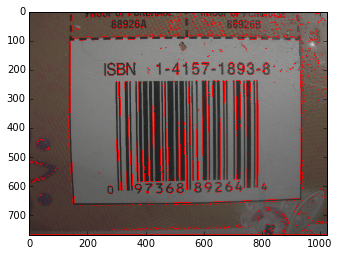

In [119]:
img, contours, hierarchy = cv2.findContours(image_barcode_bin, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

img = image_barcode.copy()
cv2.drawContours(img, contours, -1, (255,0,0), 1)
plt.imshow(img)

#### Osobine regiona

Svi pronađeni regioni imaju neke svoje karakteristične osobine: površina, obim, konveksni omotač, konveksnost, obuhvatajući pravougaonik, ugao... Ove osobine mogu biti izuzetno korisne kada je neophodno izdvojiti samo određene regione sa slike koji ispoljavaju neku osobinu. Za sve osobine pogledati https://opencv-python-tutroals.readthedocs.org/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html i https://opencv-python-tutroals.readthedocs.org/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_properties/py_contour_properties.html.

Izdvojiti samo bar-kod sa slike.

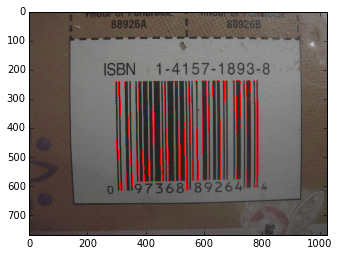

In [129]:
contours_barcode = [] # ovde ce biti samo konture koje pripadaju bar-kodu
for contour in contours: # za svaku konturu
    center, size, angle = cv2.minAreaRect(contour) # pronadji pravouganoik minimalne povrsine koji ce obuhvatiti celu konturu
    width, heigth = size
    if width > 3 and width < 30 and heigth > 300 and heigth < 400:
        contours_barcode.append(contour) # ova kontura pripada bar-kodu

img = image_barcode.copy()
cv2.drawContours(img, contours_barcode, -1, (255,0,0), 1)
plt.imshow(img)